In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import statistics

In [ ]:
#mean,median,mode
df=sns.load_dataset('tips')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
np.mean(df['total_bill'])

np.float64(19.78594262295082)

In [ ]:
np.median(df['total_bill'])

np.float64(17.795)

In [ ]:
statistics.mode(df['total_bill'])

13.42

<Axes: xlabel='total_bill'>

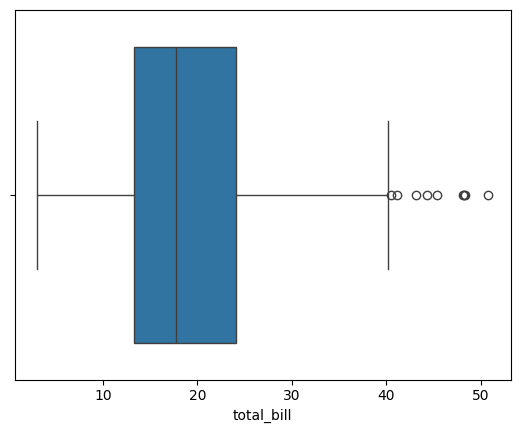

In [ ]:
sns.boxplot(x=df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

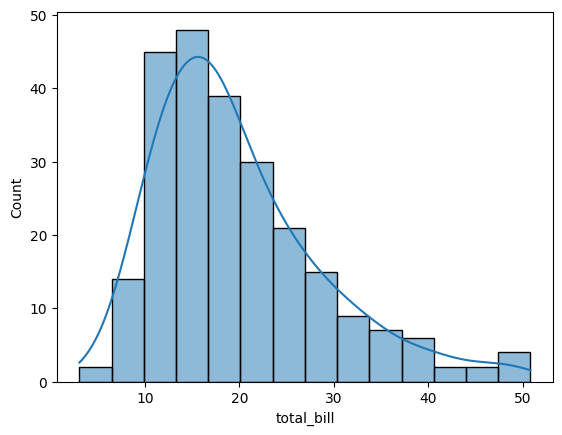

In [ ]:
sns.histplot(df['total_bill'],kde=True)

In [ ]:
df1=sns.load_dataset('iris')

In [ ]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

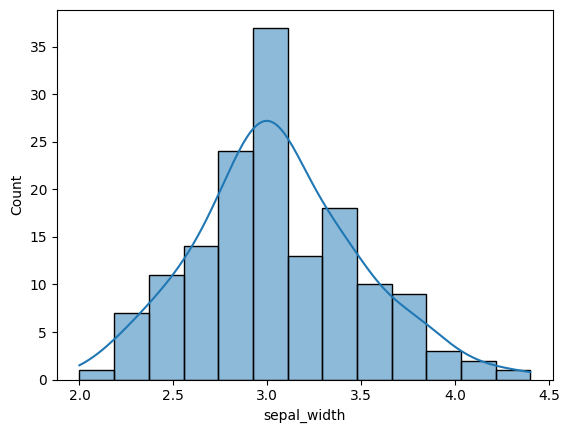

In [ ]:
sns.histplot(df1['sepal_width'],kde=True)

<Axes: xlabel='species', ylabel='count'>

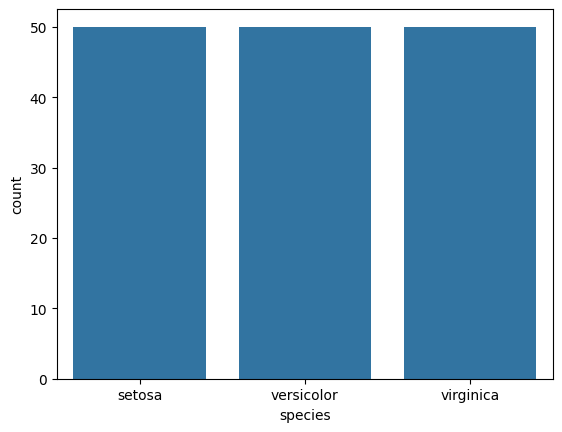

In [ ]:
sns.countplot(x='species', data=df1)

In [ ]:
np.percentile(df1['sepal_length'],[25,99])

array([5.1, 7.7])

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/CLT_sampling_distribution.png'

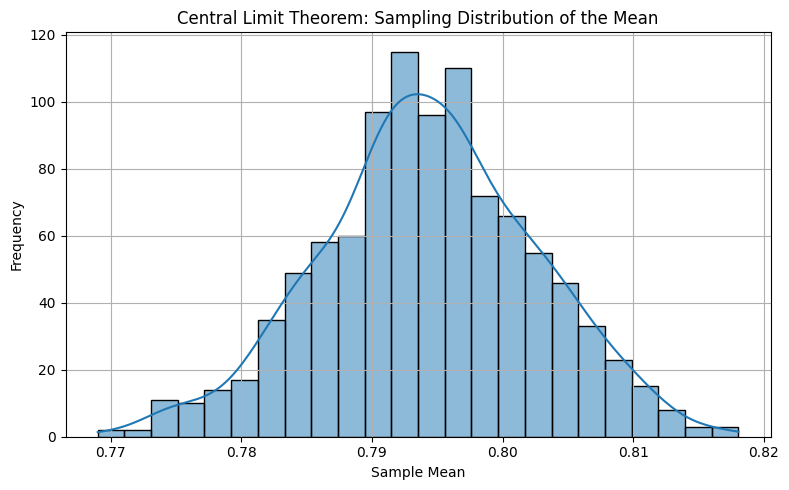

In [1]:
# Let's write Python code examples for each of the major statistics topics used in ML.
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Simulate data
model_A = np.random.normal(loc=0.80, scale=0.03, size=30)
model_B = np.random.normal(loc=0.85, scale=0.04, size=30)
model_C = np.random.normal(loc=0.82, scale=0.02, size=30)

# Combine into DataFrame for ANOVA
df_anova = pd.DataFrame({
    'Model A': model_A,
    'Model B': model_B,
    'Model C': model_C
})

# 1. Z-Test (One sample, known std)
sample_mean = np.mean(model_A)
population_mean = 0.78
population_std = 0.03
n = len(model_A)
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(n))
p_value_z = stats.norm.sf(abs(z_score)) * 2  # two-tailed

# 2. T-Test (Two-sample)
t_stat, p_value_t = stats.ttest_ind(model_A, model_B)

# 3. Chi-Square Test (Categorical)
# Simulate click data by region
observed = np.array([[30, 20], [40, 60], [50, 40]])
chi2_stat, p_chi2, dof, expected = stats.chi2_contingency(observed)

# 4. ANOVA (Comparing 3 models)
f_stat, p_value_anova = stats.f_oneway(model_A, model_B, model_C)

# 5. Skewness and Kurtosis
skewness_A = stats.skew(model_A)
kurtosis_A = stats.kurtosis(model_A)

# 6. Confidence Interval for model_A
conf_level = 0.95
ci_low, ci_high = stats.norm.interval(conf_level, loc=np.mean(model_A), scale=np.std(model_A)/np.sqrt(n))

# 7. Central Limit Theorem visualization
samples = [np.mean(np.random.choice(model_A, size=10)) for _ in range(1000)]

# Package all results into a dictionary
results = {
    "Z-Test": {"z_score": z_score, "p_value": p_value_z},
    "T-Test": {"t_statistic": t_stat, "p_value": p_value_t},
    "Chi-Square": {"chi2_stat": chi2_stat, "p_value": p_chi2, "expected": expected.tolist()},
    "ANOVA": {"f_stat": f_stat, "p_value": p_value_anova},
    "Skewness": skewness_A,
    "Kurtosis": kurtosis_A,
    "Confidence Interval (95%)": (ci_low, ci_high),
}

# Plot CLT (sampling distribution of means)
plt.figure(figsize=(8, 5))
sns.histplot(samples, kde=True)
plt.title("Central Limit Theorem: Sampling Distribution of the Mean")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.savefig("/mnt/data/CLT_sampling_distribution.png")

results